In [110]:
#optimizing the parameters of LCDM model(non-flat) by minimizing the chi-squared value

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

#data of H_obs,z_obs,sigma_obs 

H_obs = np.array([69,69,68.6,83,75,75,72.9,77,88.8,83,83,95,77,87.1,92.8,89,80.9,97,104,92,105,125,90,117,154,168,160,177,140,202,186.5])
z_obs = np.array([0.07,0.09,0.12,0.17,0.179,0.199,0.20,0.27,0.28,0.352,0.3802,0.4,0.4004,0.4247,0.4497,0.47,0.4783,0.48,0.593,0.68,0.781,0.875,0.88,0.90,1.037,1.3,1.363,1.43,1.53,1.75,1.965])
sigma_obs = np.array([19.6,12,26.2,8,4,5,29.6,14,36.6,14,13.5,17,10.2,11.2,12.9,50,9,62,13,8,12,17,40,23,20,17,33.6,18,14,40,50.4])
                      


In [130]:
def H_model(z,parameters):
    omega_mo,omega_ko,Ho = parameters
    
    H_model = Ho*np.sqrt(np.abs(omega_mo*(1+z)**3 + omega_ko*(1+z)**2 + (1-omega_mo-omega_ko)))
    #print ("H_model:",H_model)
    if np.isfinite(H_model):
        return H_model

In [132]:
def chi_sq( parameters,H_obs,z_obs,sigma_obs):
    n = z_obs.shape[0]
    H_theo = np.zeros(n)
    omega_mo,omega_ko,Ho = parameters
    chi_sq = 0
    for i in range(n):
        H_theo[i]= H_model( z_obs[i],parameters)
        #print("H_obs, H_theo:", H_obs[i], H_theo[i])
        chi_sq = chi_sq + ((H_obs[i] - H_theo[i])/(sigma_obs[i]))**2
    return chi_sq

In [134]:
initial = np.array([0.3,0.05,70])
soln = minimize( chi_sq ,initial,args=( H_obs,z_obs,sigma_obs),bounds=[(0,1),(-0.7,0.7),(0,np.inf)])
print("Optimal Parameters:", soln.x)
print("Convergence:", soln.success)

Optimal Parameters: [ 0.35974903 -0.12592389 68.99872546]
Convergence: True


In [136]:
initial = np.array([0.3,0.05,70])
soln = minimize( chi_sq ,initial,args=( H_obs,z_obs,sigma_obs),bounds=[(0,1),(-0.7,0.7),(0,np.inf)])
print(soln)

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 14.461769539031444
        x: [ 3.597e-01 -1.259e-01  6.900e+01]
      nit: 21
      jac: [ 6.395e-05  2.665e-05  1.243e-06]
     nfev: 96
     njev: 24
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>


In [138]:
def log_prior(parameters):
    omega_mo,omega_ko,Ho = parameters
    if  0 <= omega_mo <= 1 and -0.7 <= omega_ko <= 0.7 and 0 <= Ho <= np.inf:
        return 0.0
    return -np.inf

In [140]:
def log_likelihood(parameters, H_obs, z_obs, sigma_obs):
    return -chi_sq(parameters, H_obs, z_obs, sigma_obs)/2

In [149]:
def log_probability(parameters,H_obs,z_obs ,sigma_obs):
    lp= log_prior(parameters)
    if not np.isfinite(lp):
        return -np.inf
    #print(lp)
    #print(lp + log_likelihood(parameters,H_obs,z_obs,sigma_obs)
    return lp + log_likelihood(parameters,H_obs,z_obs,sigma_obs)

In [151]:
import emcee
pos = soln.x +1e-4 * np.random.randn(200,3)
nwalkers ,ndim = pos.shape
sampler = emcee.EnsembleSampler(
    nwalkers,ndim,log_probability ,args =( H_obs,z_obs,sigma_obs))

In [153]:
pos,prob,state = sampler.run_mcmc(pos,2000,progress= True)

100%|██████████| 2000/2000 [00:47<00:00, 42.48it/s]


In [155]:
sampler.reset()

In [157]:
sampler.run_mcmc(pos,10000,progress=True)

100%|██████████| 10000/10000 [03:54<00:00, 42.64it/s]


State([[ 7.51533686e-02  5.67301554e-01  6.65555743e+01]
 [ 1.91829482e-01  3.32141505e-01  6.63324253e+01]
 [ 4.09734786e-01 -2.94130071e-02  6.38261179e+01]
 [ 3.10946751e-01  2.97562439e-01  6.34192506e+01]
 [ 4.68344605e-01 -2.26872022e-01  6.66316652e+01]
 [ 3.04760856e-01 -1.02553310e-01  6.82496262e+01]
 [ 2.01943826e-01  1.09120159e-01  6.90219064e+01]
 [ 2.29684130e-01  1.45874701e-01  6.84231189e+01]
 [ 2.72565149e-01  1.98949098e-01  6.55535760e+01]
 [ 2.48194895e-01  1.01194345e-01  6.83346185e+01]
 [ 1.98848943e-01  2.78432104e-01  6.93087848e+01]
 [ 4.57878794e-01 -7.61412688e-03  6.25550834e+01]
 [ 4.18233759e-01 -2.37771709e-01  6.94660057e+01]
 [ 2.43692438e-01  1.54316378e-01  6.58714087e+01]
 [ 4.32615381e-01 -9.64590726e-02  6.31697514e+01]
 [ 1.24597515e-01  4.98274061e-01  6.62947226e+01]
 [ 1.47332252e-01  4.88236246e-01  6.50678164e+01]
 [ 2.47975978e-01  1.81639734e-01  6.50077064e+01]
 [ 1.90486728e-01  7.69395112e-02  7.13694523e+01]
 [ 3.81564245e-01 -3.9584

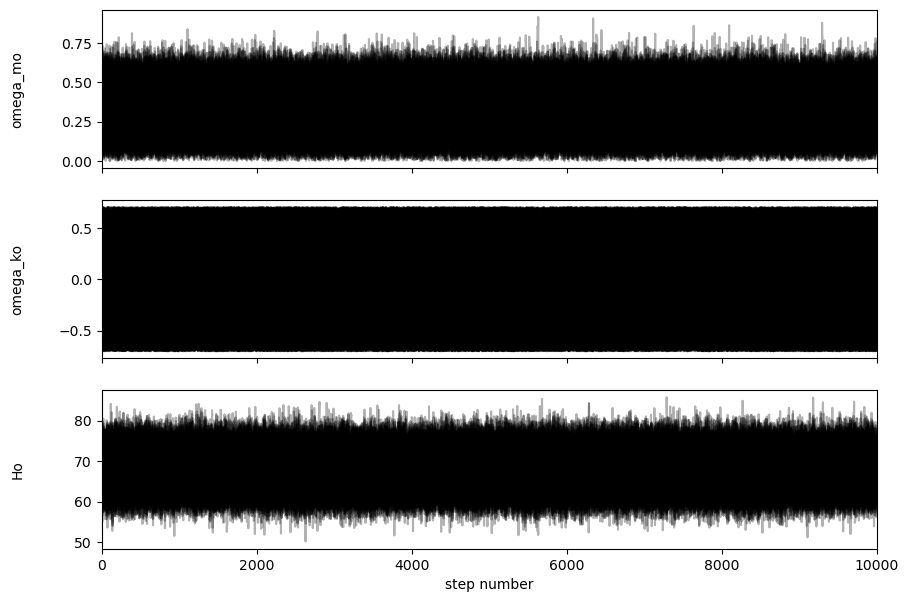

In [159]:
fig, axes = plt.subplots(3,figsize =(10,7),sharex=True)
samples = sampler.get_chain()
labels = ["omega_mo","omega_ko","Ho"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:,:,i],"k",alpha= 0.3)
    ax.set_xlim(0,len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1,0.5)
    axes[-1].set_xlabel("step number");

In [161]:
tau = sampler.get_autocorr_time()
print(tau)

[42.88030535 44.97448175 43.8177328 ]


In [163]:
samples.shape

(10000, 200, 3)

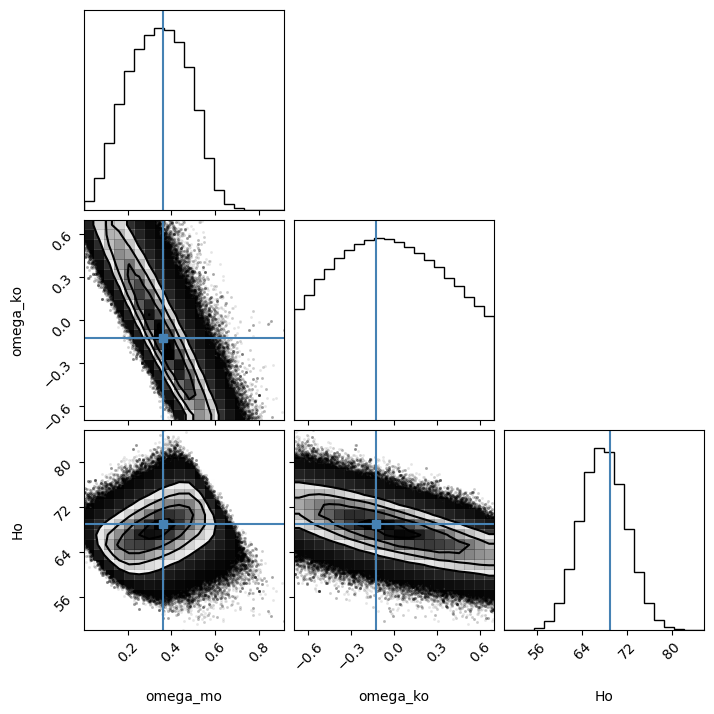

In [165]:
import corner
flat_samples = sampler.get_chain(flat =True)
fig = corner.corner(flat_samples,labels = labels ,truths = soln.x);

In [167]:
from IPython.display import display,Math
for i in range(ndim):
    mcmc = np.percentile(flat_samples[:,i],[15.87, 50, 84.13])
    q= np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1],q[0],q[1],labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [169]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"
import sys,os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
from getdist import plots,MCSamples
import getdist
import matplotlib.pyplot as plt
import IPython
print('GetDist Version :%s ,Matplotlib version:%s'%(getdist.__version__,plt.matplotlib.__version__))
      

GetDist Version :1.4.6 ,Matplotlib version:3.8.0


In [171]:
names = ["omega_mo","omega_ko","Ho"]
labels = ["Omega_mo","omega_ko","Ho"]
samples = MCSamples(samples=flat_samples,names=names,labels=labels)

Removed no burn in


In [173]:
means = samples.getMeans()
stats = samples.getMargeStats()
conf_levels = samples.contours

In [175]:
print(means)
mcmc

[ 3.39351224e-01 -1.62178122e-02  6.78890586e+01]


array([63.86283706, 67.8314729 , 71.94548939])

In [177]:
lims0 = stats.parWithName('omega_mo').limits
lims1 = stats.parWithName('Ho').limits

In [194]:
for conf,lim0,lim1 in zip(samples.contours,lims0,lims1):
    #print(lim.lower,mcmc1[1])
    if conf != 0.6827:
        continue
        print('value: %.3f,lower: %.3f,upper: %.3f'%(means[0],lim0.lower-means[0],lim.upper-means[0]))
        print('value: %.3f,lower: %.3f,upper: %.3f'%(means[1],lim0.lower-means[1],lim.upper-means[1]))
    

<Figure size 600x450 with 0 Axes>

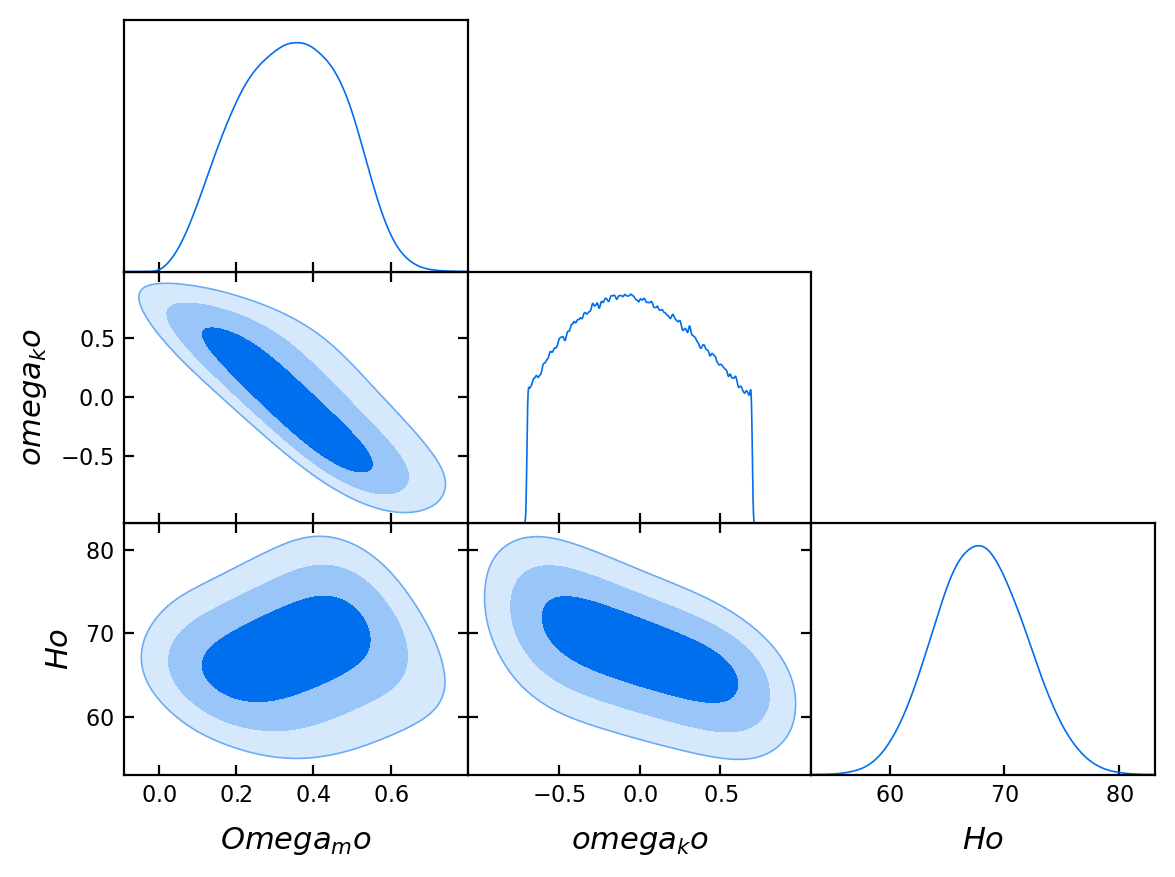

In [184]:
# g = plots.get_single_plotter()
# samples.updateSettings({'contours':[0.6827,0.9545,0.9973]})
# g.settings.num_plot_contours = 4
# g.triangle_plot([samples],filled= True);


g = plots.get_single_plotter()
samples.updateSettings({
    'contours': [0.6827, 0.9545, 0.9973], 
    'fine_bins_2D': 2000,  # Adjust this value as needed
    'smooth_scale_2D': 0.5,  # Adjust smoothing
    'fig_size':(10,10), # Increase figure size
    'dpi':500 # Increase resolution
})

g.settings.num_plot_contours = 4
# g.settings.fig_size = (8, 8)  
# g.settings.dpi = 300  

g.triangle_plot([samples], filled=True)